In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
from pandas import tseries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('Consumption.csv', parse_dates = ['Date'], index_col = 'Date',
                   date_parser = dateparse)
data.dtypes

Dotcom          int64
Mobile          int64
Connected TV    int64
dtype: object

In [12]:
data2 = data.iloc[:,1]
data2.head()

Date
2014-07-31    4145770
2014-08-31    2653899
2014-09-30    4050363
2014-10-31    5597491
2014-11-30    5304073
Name: Mobile, dtype: int64

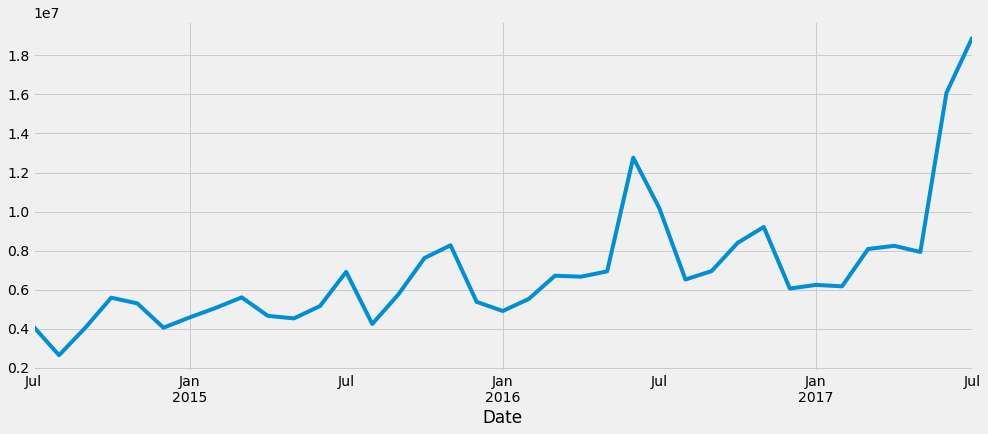

In [13]:
data2.plot(figsize=(15, 6))
plt.show()

In [14]:
data2.dtypes

dtype('int64')

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data2, order = param, 
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

## the outcome prints the particular model with its AIC value. The 'best' model is the one with
## the lowest AIC value with respect to the rest of the model AIC values.